<a href="https://colab.research.google.com/github/KontainPluton/TPs_Artificial_Neural_Network/blob/main/%5BTP_2%5D_Convolutional_Neural_Networks_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks (CNNs)

This practical session is dedicated to a special kind of multi-layer neural networks called convolutional neural networks (CNNs). CNNs have been proposed by [Yann LeCun](http://yann.lecun.com/exdb/publis/pdf/lecun-89.pdf) and is now widely used in image and video processing. 
 
In the last session, you experimented a Multi-Layer Perceptron (MLP) architecture for handwritten digit recongnition on MNIST dataset. You have noticed that the performance was quite good (accuracy of 93% using a single epoch). So, you may wonder why do we need to introduce a new type of neural netwoks to process images?

To understand this, let us take an example with an image of bigger size than the one we used on MNIST dataset (remember images on MNIST dataset are 28x28 pixels). Let's say we have a 100 x 100 pixels image. If we use our MLP, we will need 10000 inputs in order to process the image (remember we would use flatten to transorm the 100 x 100 pixels into a vector like format of size 10000). 

Remember, the first hidden layer we use had 1000 neurones. In that context, it means that dealing with our 100 x 100 images, the first weight matrix of our MLP would be of size 10000 x 1000... So for the first hidden layer only, we would have 10 million parameters! This is a huge number considering we are only on the first hidden layer! It would be difficult for the optimizer to find good values for the parameters, thus training time becomes longer and may not result on a good validation accuracy. As we will see, CNNs solve this problem by using **partially connected layers** and **weight sharing**. 



## [Type of convolutional layers](https://datascience.stackexchange.com/a/51474)
You can encounter 3 types of convolutional layers (all implemented in Pytorch).

**1D convolution ([conv1d](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html#torch.nn.Conv1d)) :**  is generally used to process one dimensional data like voice or even sentences. 

**2D convolution ([Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d)) :**  the most common type of convolution encountered in practice. It is widely used to process input images. 


**3D convolution ([Conv3d](https://pytorch.org/docs/stable/generated/torch.nn.Conv3d.html#torch.nn.Conv3d)) :** its common use case is with video data since we need to process a frame of images at a time.  


## CNN main components
To explain how convolutional layer works, let us take an example of 2D convolution (the principle is the same for the 1D and 3D convolutions) and look at its corresponding pytorch function : 
```python

torch.nn.Conv2d(in_channels: int, out_channels: int, kernel_size: Union[T, Tuple[T, T]], stride: Union[T, Tuple[T, T]] = 1, padding: Union[T, Tuple[T, T]] = 0, dilation: Union[T, Tuple[T, T]] = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros')

```


### Input channels : 
In the original input, `in_channels` correspond to the number of data streams for an input. For an RGB image, there are 3 input channels, one for each color channel. For a grey-scale image, there is only one channel. The number of input channels in intermediate convolutional layers corresponds to the number of output channels of the previous layer.



### Output channels : 
It corresponds to the number of feature maps that will be generated by the convolution layer (more detail on the next point). Feature maps are detailled below.



### Convolution kernels :
Also known as filters, they are a set fixed shape window of parameters. Those filters will be used to extract features from the given input. The size of a kernel is always smaller than the size of the input. It  corresponds to a tensor of parameters (+ eventually extra bias). Most used kernel size are (3,3), (5,5) and (7,7), (9,9) for bigger input images. 

Those kernels are used to perform convolutions. The convolution operation corresponds to a dot-product between the kernel and the input. Each time, a part of the input with the same size as the kernel is used for the dot-product, which results on a partially connected layer, since it takes only a part of the input at a time. The resulting output of applying convolution kernels on an input is called feature maps. The number of feature maps corresponds to the number of the defined `out_channels`. 

The number of kernels depends on the number of input channels and output channels. For each output channel, we must provide `in_channels` kernels, one for each channel of the input, thus, the total number of kernels is equal to `in_channels` x  `out_channels`. 

Note that in its implementation, the convolution layer also includes a bias.



### Stride
Since the convolution kernel is of a smaller size than the input, it needs to move along the input to completely process it. The amount by which ther kernel moves is controlled by the stride parameter. Note that the same kernel moves to process the input, which stresses the weight sharing property of the convolutional neural networks.

Here's an [animated](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md) convolutional operation with a one-channel input (in blue) of size 4 x 4 and a (3,3) kernel that moves by a stride of 1. It results on a single output feature map of size 2x2 (in green) 


![](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_no_strides.gif)



### Padding 
The padding corresponds to the amount of pixel added to an image when processed by the kernel. The pixel values added as padding is generally 0. There are few advantages on adding a padding to an image :
- Prevents from loosing pixels from the border of the image : each time a convolution layer is applied, our input image shrinks. This may result on a loss of information. Adding a padding helps us keeping the border pixel values while processing the image.

- Shrinking the input by applying multiple convolution layers limits the number of time we can use these layers to process our input images ; adding a padding helps to augment the number of layers we can use.

The image below shows a 10x10 image with a padding of 1 added to each side. Note that, by doing this, our image is now of size 12x12. As an example, considering such a padding using a kernels of size 4 x 4 would lead to a better characterization of the image (more features per map).



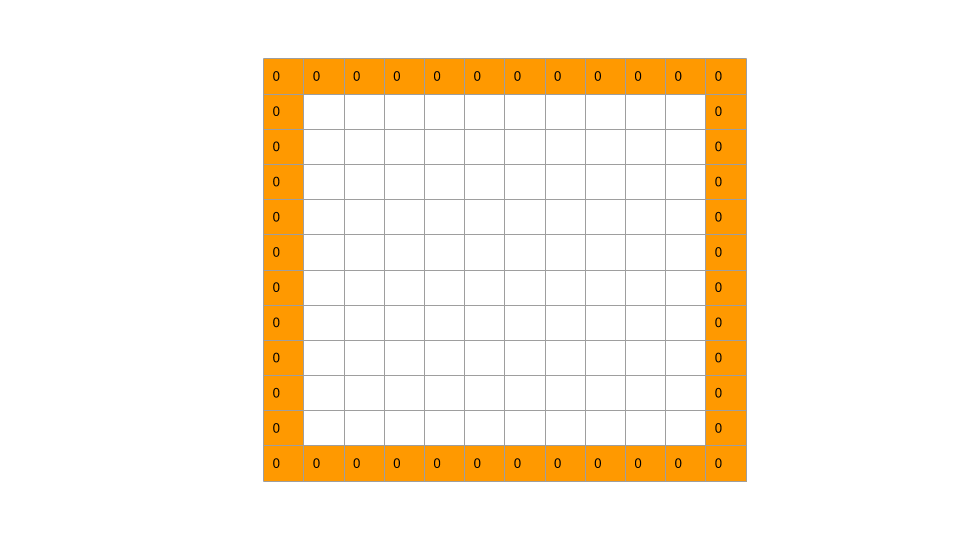

### Example 
To help understand more how it works, let's take a toy example of one input that have 3 channels. The size of the input is 4x4. Then, let's create an conv2d layer with no bias and examine the convolution operation.

In [ ]:
import torch

input = torch.rand(1,3,4,4) # create an input of shape [1,3,4,4]: Batch size, nb channels, height, width
print("Input shape : {}\n".format(input.shape))

# note that the default required arguments to define a convolution layer are in_channels, out_channels and kernel_size
conv_layer = torch.nn.Conv2d(in_channels=3, out_channels=1,kernel_size=(3,3),stride=1,padding=0, bias=False)


# let's examine the shape of the weight matrix of the convolution layer
print("Convolution layer weight matrix shape {}".format(conv_layer.weight.shape))

Input shape : torch.Size([1, 3, 4, 4])

Convolution layer weight matrix shape torch.Size([1, 3, 3, 3])


Here's how to interprete the size of the weight matrix: 
- 1 corresponds to the number of out channels; 
- 3 in the second dimension refers to the number input channels
- the last dimensions correspond to the kernel size (here 3, 3)

**Question**: considering the size of the input and the parameters of the convolution, how many feature map values do you expect? 

Let us now compute the result of applying the convolution layer on our input and print out the result.


In [ ]:
conv_output = conv_layer(input)
print("The result of the convolution :\n {}\n".format(conv_output))
print("Shape of the result of the convolution: {}\n".format(conv_output.shape))

The result of the convolution :
 tensor([[[[ 0.2654, -0.0194],
          [ 0.0476, -0.1275]]]], grad_fn=<ConvolutionBackward0>)

Shape of the result of the convolution: torch.Size([1, 1, 2, 2])



As you can see, the result of the convolution is a 2x2 feature map with 1 channel (refer to the illustration above, it's the same thing).

See the parameters of your 3 kernels (each one is specific to one input channel):



In [ ]:
print(conv_layer.weight)

Parameter containing:
tensor([[[[ 0.0662, -0.1857, -0.0432],
          [ 0.0854, -0.0852, -0.0853],
          [ 0.1287,  0.1301, -0.0264]],

         [[ 0.0643,  0.1807,  0.0479],
          [-0.0773, -0.1266, -0.1399],
          [ 0.0780, -0.0839, -0.1579]],

         [[ 0.1243, -0.1783, -0.0147],
          [-0.0389, -0.0345,  0.0497],
          [ 0.1322,  0.1586,  0.1833]]]], requires_grad=True)



To understand more the convolution operation, let's try to *manually* reproduce the result and compare it to the values obtained by the convolution layer. 


In [ ]:
#let's first get the convlution layer weight matrix. 
weight = conv_layer.weight # shape : [out_channel, in_channel, kernel_size[0], kernel_size[1]]

# weight[0,0] is the convolution kernel on in_channel 1
# weight[0,1] is the convolution kernel on in_channel 2
# weight[0,2] is the convolution kernel on in_channel 3

# fmv = feature map value

kernel_c1 = weight[0,0]

fmv_c1 = torch.Tensor(
    [
     [( kernel_c1 * input[0,0,0:3,0:3]).sum(), (kernel_c1 * input[0,0,0:3,1:4]).sum()], 
     [( kernel_c1 * input[0,0,1:4,0:3]).sum(), (kernel_c1 * input[0,0,1:4,1:4]).sum()]
    ]
)

kernel_c2 = weight[0,1]

fmv_c2 = torch.Tensor(
    [
     [(kernel_c2  * input[0,1,0:3,0:3]).sum(), (kernel_c2  * input[0,1,0:3,1:4]).sum()], 
     [(kernel_c2  * input[0,1,1:4,0:3]).sum(), (kernel_c2  * input[0,1,1:4,1:4]).sum()]
    ]
)

kernel_c3 = weight[0,2]

fmv_c3 = torch.Tensor(
    [
     [(kernel_c3 * input[0,2,0:3,0:3]).sum(), (kernel_c3 * input[0,2,0:3,1:4]).sum()], 
     [(kernel_c3 * input[0,2,1:4,0:3]).sum(), (kernel_c3 * input[0,2,1:4,1:4]).sum()]
    ]
)

output = fmv_c1 + fmv_c2 + fmv_c3

print(output)

# Which can also be expressed by
# --- 

fmv0 = (weight[0,0] * input[0,0,0:3,0:3] + weight[0,1] * input[0,1,0:3,0:3] + weight[0,2] * input[0,2,0:3,0:3]).sum()
fmv1 = (weight[0,0] * input[0,0,0:3,1:4] + weight[0,1] * input[0,1,0:3,1:4] + weight[0,2] * input[0,2,0:3,1:4]).sum()
fmv2 = (weight[0,0] * input[0,0,1:4,0:3] + weight[0,1] * input[0,1,1:4,0:3] + weight[0,2] * input[0,2,1:4,0:3]).sum()
fmv3 = (weight[0,0] * input[0,0,1:4,1:4] + weight[0,1] * input[0,1,1:4,1:4] + weight[0,2] * input[0,2,1:4,1:4]).sum()


print("fmv0 = {:.4f}, conv_output_0 = {:.4f}".format(fmv0.item() , conv_output[0,0,0,0].item()))
print("fmv1 = {:.4f}, conv_output_1 = {:.4f}".format(fmv1.item() , conv_output[0,0,0,1].item()))
print("fmv2 = {:.4f}, conv_output_2 = {:.4f}".format(fmv2.item() , conv_output[0,0,1,0].item()))
print("fmv3 = {:.4f}, conv_output_3 = {:.4f}".format(fmv3.item() , conv_output[0,0,1,1].item()))

tensor([[ 0.2654, -0.0194],
        [ 0.0476, -0.1275]])
fmv0 = 0.2654, conv_output_0 = 0.2654
fmv1 = -0.0194, conv_output_1 = -0.0194
fmv2 = 0.0476, conv_output_2 = 0.0476
fmv3 = -0.1275, conv_output_3 = -0.1275


### Pooling
The goal of the pooling layer is to shrink the feature maps in order to reduce the memory usage, the computational load and the number of parameters of the next layers. Just like the convolution layer, this layer is also a sliding window so it is necessary to define a kernel size, the stride and a padding but does not require to know the number of input and output channels, since they will perform the same operations regardless the number of feature maps. 
The difference between the convolution layer and the pooling layer is that, this latter, do not have learnable parameters. 

There are two types of pooling layers :
- **Average pooling** : it computes and average value of a `kernel_size` window for each feature map.

- **Max pooling** : it computes the maximum value of a `kernel_size` window for each feature map.

The image below shows an example of how the two pooling layers work.
The matrix to the left represents the output of the conv layer, i.e. feature map values. The matrix to the left is the output of the pooling layer.



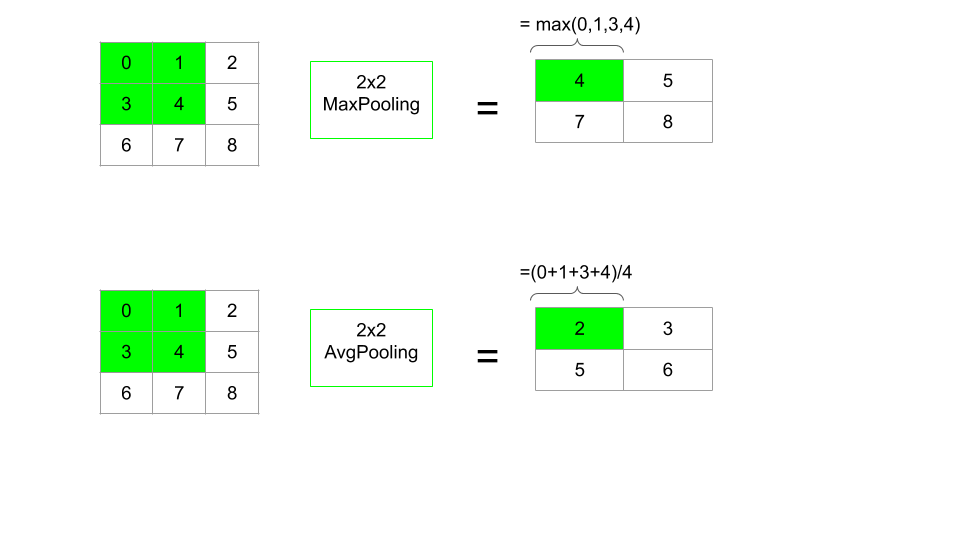

Pytorch defines pooling layers for 1d, 2d and 3d inputs just as we saw for the convolution layer.
Here are the links to the 2d versions of both max and average pooling layers

https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html#torch.nn.AvgPool2d

https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d

## Exercice : LeNet-5

You will now implement [LeNet-5](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf), one of the first convolutional neural networks that later inspired the design of modern deep convolution architectures like [AlexNet](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf).
This architecture uses a 2D convolution layer as a building bloc to process images. We will use it on the MNIST dataset (recall that MNIST dataset has images with 1 channel, width of 28 and height of 28).

The image below represents the architecture of LeNet-5. The detail of each layer is given in the table that follows. Note that, in the original model, the activation function used is ```tanh```. To speed up training, we replaced it by the ```ReLU``` activation.

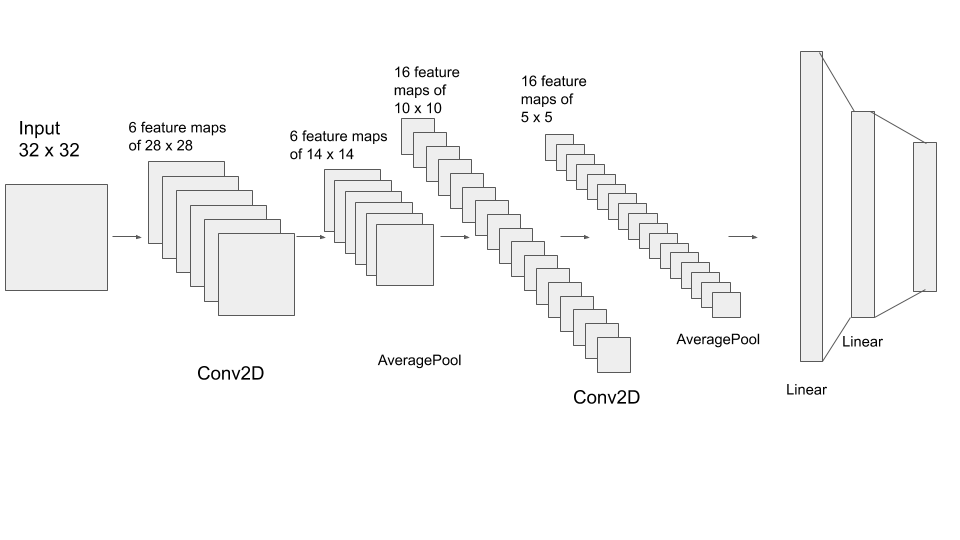

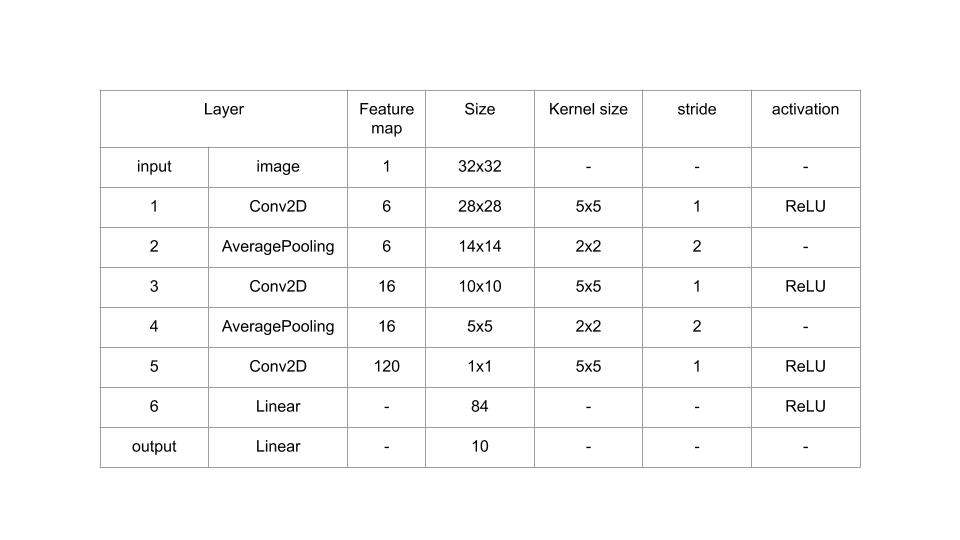

In [4]:
import torch
import torch.nn.functional as F

class LeNet5(torch.nn.Module):

  def __init__(self, D_out):
    super(LeNet5, self).__init__()

    # Stride = Move of the convolution kernel (in number of pixels)
    self.conv2d_1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), stride=1, padding=2) 
    self.avgPool_1 = torch.nn.AvgPool2d(kernel_size=(2,2), stride=2)

    self.conv2d_2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=1)
    self.avgPool_2 = torch.nn.AvgPool2d(kernel_size=(2,2), stride=2)

    self.conv2d_3 = torch.nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5,5), stride=1)

    self.flatten = torch.nn.Flatten()

    self.linear_1 = torch.nn.Linear(120, 84)
    self.linear_2 = torch.nn.Linear(84, D_out) 

    #self.maxPool_1 = torch.nn.MaxPool2d(kernel_size=(2,2), stride=2) # Question 2
    #self.maxPool_2 = torch.nn.MaxPool2d(kernel_size=(2,2), stride=2) # Question 2

    #self.linear_2 = torch.nn.Linear(84, 84) # Question 4
    #self.linear_3 = torch.nn.Linear(84, 84) # Question 4
    #self.linear_4 = torch.nn.Linear(84, D_out) # Question 4
  
  def forward(self, x):
    """
      :param: x : the image to process ( shape [batch_size, 1, height, width] )
      :return: logits: the unscaled output scores that will be process by the softmax ( shape [batch_size, D_out] )
    """
    x = F.relu(self.conv2d_1(x)) # Return shape : (batch size), 6, 28, 28  
    x = self.avgPool_1(x) # Return shape : (batch size), 6, 14, 14
    
    x = F.relu(self.conv2d_2(x)) # Return shape : (batch size), 16, 10, 10  
    x = self.avgPool_2(x) # Return shape : (batch size), 16, 5, 5
  
    x = F.relu(self.conv2d_3(x)) # Return shape : (batch size), 120, 1, 1

    x = self.flatten(x) # Return shape : (batch size), 120

    x = F.relu(self.linear_1(x)) # Return shape : (batch size), 84
    x = self.linear_2(x) # Return shape : (batch size), D_out

    # Question 2 : (Replace avgPool_1 and avgPool_2 with maxPool_1 and maxPool_2)
    # Question 4 : (Comment self_linear_2(x) and Uncomment next lines)
    #x = F.relu(self.linear_2(x))
    #x = F.relu(self.linear_3(x))
    #x = self.linear_4(x)

    return x

Now load the dataset and define the procedure. 

We load the MNIST dataset using the torchvision package.

In [5]:
from torchvision import datasets, transforms

'''
  This code is used to download the dataset which is already splitted
  into a training  set and a testing set.
  Note that we apply simple transformation to the data to convert them
  into PyTorch Tensors and to normalize the pixel values entries in a 
  specific range of values. 
'''

transform_actions = transforms.Compose(
    [
     #transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))
    ]
)

mnist_trainset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform = transform_actions
)
    
mnist_testset = datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform = transform_actions
)


print("Training set size: ", len(mnist_trainset))
print("Testing set size : ", len(mnist_testset))

# we define a loader and an iterator to process the training set
trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=32, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training set size:  60000
Testing set size :  10000


We also use the same training procedure we used in the previous practical session.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def train_optim(model, epochs, log_frequency, device, learning_rate=1e-4):

  AccuracyForEachIteration = []

  model.to(device) # we make sure the model is on the proper device

  # Multiclass classification setting, we use cross-entropy
  # note that this implementation requires the logits as input 
  # logits: values prior softmax transformation 
  loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')

  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  
  for t in range(epochs):

      model.train() # we specify that we are training the model

      # At each epoch, the training set will be processed as a set of batches
      for batch_id,  batch in enumerate(trainloader) : 

        images, labels  = batch

        # we put the data on the same device
        images , labels = images.to(device), labels.to(device)  
        
        y_pred = model(images) # forward pass output=logits

        loss = loss_fn(y_pred, labels)

        if batch_id % log_frequency == 0:
            print("epoch: {:03d}, batch: {:03d}, loss: {:.3f} ".format(t+1, batch_id+1, loss.item()))

        optimizer.zero_grad() # clear the gradient before backward
        loss.backward()       # update the gradient

        optimizer.step() # update the model parameters using the gradient

      # Model evaluation after each step computing the accuracy
      model.eval()
      total = 0
      correct = 0
      for batch_id, batch in enumerate(testloader):
        images , labels = batch
        images , labels = images.to(device), labels.to(device)
        y_pred = model(images) # forward computes the logits
        sf_y_pred = torch.nn.Softmax(dim=1)(y_pred) # softmax to obtain the probability distribution
        _, predicted = torch.max(sf_y_pred , 1)     # decision rule, we select the max
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

      AccuracyForEachIteration = np.append(AccuracyForEachIteration,(100 * correct / total))
      print("[validation] accuracy: {:.3f}%\n".format(100 * correct / total))

  plt.plot(np.arange(0,epochs),AccuracyForEachIteration,color='red')
  plt.xlabel('iteration')
  plt.ylabel('accuracy')
  plt.show()

Let us now instanciate our LeNet-5 model and train it.

epoch: 001, batch: 001, loss: 2.313 
epoch: 001, batch: 901, loss: 0.046 
epoch: 001, batch: 1801, loss: 0.198 
[validation] accuracy: 97.550%

epoch: 002, batch: 001, loss: 0.008 
epoch: 002, batch: 901, loss: 0.010 
epoch: 002, batch: 1801, loss: 0.065 
[validation] accuracy: 98.450%

epoch: 003, batch: 001, loss: 0.043 
epoch: 003, batch: 901, loss: 0.005 
epoch: 003, batch: 1801, loss: 0.013 
[validation] accuracy: 97.950%

epoch: 004, batch: 001, loss: 0.030 
epoch: 004, batch: 901, loss: 0.005 
epoch: 004, batch: 1801, loss: 0.025 
[validation] accuracy: 98.860%

epoch: 005, batch: 001, loss: 0.002 
epoch: 005, batch: 901, loss: 0.005 
epoch: 005, batch: 1801, loss: 0.001 
[validation] accuracy: 98.700%

epoch: 006, batch: 001, loss: 0.096 
epoch: 006, batch: 901, loss: 0.080 
epoch: 006, batch: 1801, loss: 0.002 
[validation] accuracy: 98.890%

epoch: 007, batch: 001, loss: 0.037 
epoch: 007, batch: 901, loss: 0.046 
epoch: 007, batch: 1801, loss: 0.007 
[validation] accuracy: 9

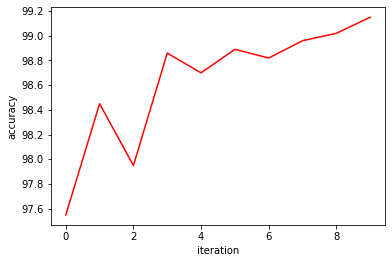

In [ ]:
D_out = 10 # Number of classes for this classification problem
eta = 1e-3 # Learning rate
Iteration = 10 # Epochs / Number of iteration
logs = 900 # Log Frequency

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # Select the device

model = LeNet5(D_out)

train_optim(model, epochs=Iteration, log_frequency=logs, device=device, learning_rate=eta)


**Question 1**

Compare the performance of LeNet5 and the Multi-Layer Perceptron we defined in the previous session. Does the convolution bring any performance gain ?

*Answer : Yes ! With the MLP we obtained an accuracy around 93%, here with LeNet5 we can obtain an accuracy around 98%.(With the same amount of iterations)*


**Question 2**

Replace the  average pooling by a max pooling. Does this improve the model accuracy ? 

*Answer : We obtain equivalent results between the two pooling functions (even if max seems to help the model to converge faster)*

epoch: 001, batch: 001, loss: 0.000 
epoch: 001, batch: 901, loss: 0.000 
epoch: 001, batch: 1801, loss: 0.000 
[validation] accuracy: 98.950%

epoch: 002, batch: 001, loss: 0.001 
epoch: 002, batch: 901, loss: 0.000 
epoch: 002, batch: 1801, loss: 0.000 
[validation] accuracy: 98.980%

epoch: 003, batch: 001, loss: 0.004 
epoch: 003, batch: 901, loss: 0.000 
epoch: 003, batch: 1801, loss: 0.000 
[validation] accuracy: 98.900%

epoch: 004, batch: 001, loss: 0.000 
epoch: 004, batch: 901, loss: 0.002 
epoch: 004, batch: 1801, loss: 0.008 
[validation] accuracy: 98.950%

epoch: 005, batch: 001, loss: 0.005 
epoch: 005, batch: 901, loss: 0.012 
epoch: 005, batch: 1801, loss: 0.012 
[validation] accuracy: 99.060%

epoch: 006, batch: 001, loss: 0.000 
epoch: 006, batch: 901, loss: 0.000 
epoch: 006, batch: 1801, loss: 0.000 
[validation] accuracy: 99.040%

epoch: 007, batch: 001, loss: 0.000 
epoch: 007, batch: 901, loss: 0.008 
epoch: 007, batch: 1801, loss: 0.000 
[validation] accuracy: 9

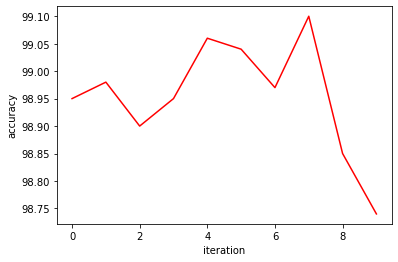

In [ ]:
# LeNet5 Model, with max pooling

train_optim(model, epochs=Iteration, log_frequency=logs, device=device, learning_rate=eta)

**Question 3**
The code snippet below allows you to check the number of parameters for the first convolution layer.
```python
sum(p.data.nelement() for p in model.conv1.parameters())
```

Use this code to check the number of parameters of LeNet5 model. Compare this number to the number of parameters of the MLP model 

*(help : you can find the code of the MLP model below)*

*Answer : We have more parameters in LeNet5 than in the MLP Model (61706 instead of 59850).* 

*/!\ These values change according to the hyper parameters of the models. /!\*

In [ ]:
print("Nb params of first conv layer : {}".format(sum(p.data.nelement() for p in model.conv2d_1.parameters())))
print("Nb params of second conv layer : {}".format(sum(p.data.nelement() for p in model.conv2d_2.parameters())))
print("Nb params of third conv layer : {}".format(sum(p.data.nelement() for p in model.conv2d_3.parameters())))
print("Nb params of first linear layer : {}".format(sum(p.data.nelement() for p in model.linear_1.parameters())))
print("Nb params of second linear layer : {}".format(sum(p.data.nelement() for p in model.linear_2.parameters())))

print("Nb params of LeNet5 : {}".format(sum(p.data.nelement() for p in model.parameters())))

Nb params of first conv layer : 156
Nb params of second conv layer : 2416
Nb params of third conv layer : 48120
Nb params of first linear layer : 10164
Nb params of second linear layer : 850
Nb params of LeNet5 : 61706


In [ ]:
class MyModel(torch.nn.Module):
  def __init__(self, D_in, H, H2, D_out):
    super(MyModel, self).__init__()
    self.flatten = torch.nn.Flatten()
    self.lin1 = torch.nn.Linear(D_in, H)
    self.lin2 = torch.nn.Linear(H, H2)
    self.lin3 = torch.nn.Linear(H2, D_out)

  def forward(self, x):
    """
      x : [batch_size, 1, height, width ]
    """
    x = self.flatten(x) # [batch_size, 1 * width * height]
    x = F.relu( self.lin1(x) ) 
    x = F.relu( self.lin2(x) )
    x = self.lin3(x)

    return x

In [ ]:
H = 64 # Nb of neurons in first layer
H2 = 128 # Nb of neurons in other layers
D_in = 28 * 28 # 1 Image = 28 x 28 pixels
D_out = 10 # Output (10 classes)

modelMLP = MyModel(D_in,H,H2,D_out)

print("Nb params of MLP Model : {}".format(sum(p.data.nelement() for p in modelMLP.parameters())))

Nb params of MLP Model : 59850


**Question 4**

Try to add more fully connected layers. Does this improve the accuracy ? 

*Answer : It doesn't seem to change the result much. There is more instability in the learning curve, but that may just be a random external effect.*

epoch: 001, batch: 001, loss: 0.001 
epoch: 001, batch: 901, loss: 0.003 
epoch: 001, batch: 1801, loss: 0.000 
[validation] accuracy: 98.980%

epoch: 002, batch: 001, loss: 0.000 
epoch: 002, batch: 901, loss: 0.000 
epoch: 002, batch: 1801, loss: 0.005 
[validation] accuracy: 98.880%

epoch: 003, batch: 001, loss: 0.000 
epoch: 003, batch: 901, loss: 0.002 
epoch: 003, batch: 1801, loss: 0.000 
[validation] accuracy: 98.990%

epoch: 004, batch: 001, loss: 0.000 
epoch: 004, batch: 901, loss: 0.017 
epoch: 004, batch: 1801, loss: 0.000 
[validation] accuracy: 99.010%

epoch: 005, batch: 001, loss: 0.000 
epoch: 005, batch: 901, loss: 0.000 
epoch: 005, batch: 1801, loss: 0.000 
[validation] accuracy: 99.050%

epoch: 006, batch: 001, loss: 0.000 
epoch: 006, batch: 901, loss: 0.000 
epoch: 006, batch: 1801, loss: 0.000 
[validation] accuracy: 98.910%

epoch: 007, batch: 001, loss: 0.218 
epoch: 007, batch: 901, loss: 0.000 
epoch: 007, batch: 1801, loss: 0.000 
[validation] accuracy: 9

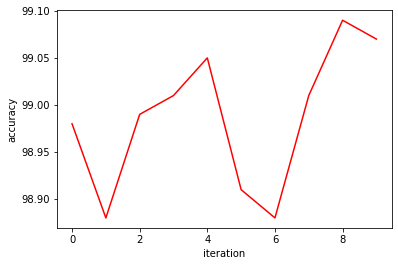

In [ ]:
# LeNet5 Model, with 2 more fully connected layers

train_optim(model, epochs=Iteration, log_frequency=logs, device=device, learning_rate=eta)

## Working with pretrained models

Generally, when working on deep learning projects, we do not start with a model from scratch. We'd rather use a pre-trained architecture.
A pre-trained architecure is a deep learning model that was trained on a large dataset, thus, it implies that the parameters of the model (the weight matrices) are no longer initialized randomly. This also means that the model captured general information about the data it was trained on and that information can be useful of other tasks (the model has "learned" something that can be valuable to perform other tasks). 

Advantanges of using a pre-trained model : 
- State of the art architecture : instead of starting with a random architecture that may need several adjustements for our task, we start with a model that was proven to be effective on other tasks
- Reduces training time for our task : since we do not train from scratch
- Effective when we do not have enough data to train a deep neural network.


There are two ways of using a pre-trained model : 
- For transfer learning : our model was previously trained on a **source** task . Our goal is to adjust it by training it on our **target** task. 
- As a feature extractor : generally, in this setting, the pre-trained model is **freezed**. Freezing a model means that its weights are no longer updated by the optimizer. To solve our task, we either add some layers (MLP, for example) or we use the features extracted on another model like SVM. 


```torchvision``` contrains several pretrained models for image processing and computer vision tasks. We will see in this practical session how to use them to solve machine learning tasks.
You can see the list of available models in the [official documentation](https://pytorch.org/docs/stable/torchvision/models.html).



You can also list the available models by using the `help` function on the models module in `torchvision`.

In [7]:
from torchvision import models

help(models)

Help on package torchvision.models in torchvision:

NAME
    torchvision.models

PACKAGE CONTENTS
    _api
    _meta
    _utils
    alexnet
    convnext
    densenet
    detection (package)
    efficientnet
    feature_extraction
    googlenet
    inception
    mnasnet
    mobilenet
    mobilenetv2
    mobilenetv3
    optical_flow (package)
    quantization (package)
    regnet
    resnet
    segmentation (package)
    shufflenetv2
    squeezenet
    swin_transformer
    vgg
    video (package)
    vision_transformer

FILE
    /usr/local/lib/python3.7/dist-packages/torchvision/models/__init__.py




To use one model, we simply instanciate it. For example, let's instanciate a [ResNet](https://arxiv.org/pdf/1512.03385.pdf) model. If you pay attention to the documentation, you will see that some models (like ResNet) have many implementations. They differ mainly on the depth of the model and size of the convolution layers. Generally, the deeper is the model, the better accuracy you have. Choosing a model will be a tradeoff between available space (deeper models have much more parameters) and accuracy we want. Let's see two examples : restnet-18 and resnet-50. 

**Note** : do not hesistate to instanciate other models to see how they were built or to later test them on different tasks

**Note 2** : pay a close attention to the output layer. Since these models were designed to be trained on [ImageNet](http://image-net.org/about-overview) dataset which has 1000 classes, we must adapt the output layer to the number of output classes of our task.

Link : Resnet18 architecture : https://penseeartificielle.fr/focus-reseau-neurones-convolutifs/proposed-modified-resnet-18-architecture-for-bangla-hcr-in-the-diagram-conv-stands-for/

In [ ]:
resnet18 = models.resnet18()
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
resnet50 = models.resnet50()
resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

You can also check the number of parameters to get an idea of how complex can be deeper models. 

In [ ]:
print("Nb params of ResNet18 : {}".format(sum(p.data.nelement() for p in resnet18.parameters())))
print("Nb params of ResNet50 : {}".format(sum(p.data.nelement() for p in resnet50.parameters())))

Nb params of ResNet18 : 11689512
Nb params of ResNet50 : 25557032


One final remark is about the model parameters (weights). As we said earlier, these models are trained on the ImageNet dataset. When we instanciate a model, we can specify wheter we load the weights found by this pretraining, or we use a model with randomly initialized weights (default). For this, each model has a boolean called pretrained. If set to False, the weights are initialized randomly (default value), if set to True, the pretrained weights will be loaded.

**Example :**

In [ ]:
alexnet = models.alexnet(pretrained=True) # load alexnet model with pretrained weights.

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

## Exercice : 

- Instanciate **two** ResNet18 models : one **with** pretrained weights and another **without** pretrained weights.
- Do the adequate modifications in order to train the two models on the MNIST dataset (pay attention to the fact that ImageNet contains colored images and 1000 classes while MNIST has grey-scale images and 10 classes)
- Compare the accuracy of the two models. Does pretraining bring any gain ? 

Let's now see how we can use a pretrained model as a feature extractor. Recall that when you use your model as a feature extractor, you **freeze** the model parameters. In practice, it means that the `requires_grad` field is set to `False`. When applying backpropagation, the freezed weights won't be updated. Better than this, the gradient will not be computed at all, [which saves you memory](https://discuss.pytorch.org/t/passing-a-subset-of-the-parameters-to-an-optimizer-equivalent-to-setting-requires-grad-of-subset-only-to-true/42866/2).

To freeze model parameters, we can create a simple function that loops over the model parameters and set the `requires_grad` attribute to `False`

In [2]:
def freeze_model(model):
  for param in model.parameters():
    param.requires_grad = False

In [21]:
# Resnet18 without pretrained weights
resnet18 = models.resnet18(pretrained=False)
resnet18.conv1 = torch.nn.Conv2d(1, 64, (7,7), stride=(2,2), padding=(3,3), bias=False) # Change the first conv layer to fit with our data
resnet18.fc = torch.nn.Linear(512, 10) # Change "output layer" to fit with our 10 classes

# Resnet18 with pretrained weights
pretrained_resnet18 = models.resnet18(pretrained=True)
pretrained_resnet18.conv1 = torch.nn.Conv2d(1, 64, (7,7), stride=(2,2), padding=(3,3), bias=False) # Change the first conv layer to fit with our data
pretrained_resnet18.fc = torch.nn.Linear(512, 10) # Change "output layer" to fit with our 10 classes

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch: 001, batch: 001, loss: 0.003 
epoch: 001, batch: 901, loss: 0.006 
epoch: 001, batch: 1801, loss: 0.005 
[validation] accuracy: 98.720%

epoch: 002, batch: 001, loss: 0.001 
epoch: 002, batch: 901, loss: 0.060 
epoch: 002, batch: 1801, loss: 0.016 
[validation] accuracy: 98.920%

epoch: 003, batch: 001, loss: 0.057 
epoch: 003, batch: 901, loss: 0.001 
epoch: 003, batch: 1801, loss: 0.000 
[validation] accuracy: 99.350%

epoch: 004, batch: 001, loss: 0.001 
epoch: 004, batch: 901, loss: 0.010 
epoch: 004, batch: 1801, loss: 0.002 
[validation] accuracy: 99.130%

epoch: 005, batch: 001, loss: 0.002 
epoch: 005, batch: 901, loss: 0.014 
epoch: 005, batch: 1801, loss: 0.002 
[validation] accuracy: 99.200%



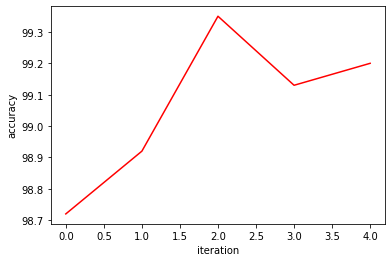

In [11]:
# Resnet18 without pretrained weights

D_out = 10 # Number of classes for this classification problem
eta = 1e-3 # Learning rate
Iteration = 5 # Epochs / Number of iteration
logs = 900 # Log Frequency

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # Select the device

# Train : 
train_optim(resnet18, epochs=Iteration, log_frequency=logs, device=device, learning_rate=eta)

epoch: 001, batch: 001, loss: 2.975 
epoch: 001, batch: 901, loss: 0.075 
epoch: 001, batch: 1801, loss: 0.071 
[validation] accuracy: 98.430%

epoch: 002, batch: 001, loss: 0.007 
epoch: 002, batch: 901, loss: 0.043 
epoch: 002, batch: 1801, loss: 0.211 
[validation] accuracy: 98.810%

epoch: 003, batch: 001, loss: 0.027 
epoch: 003, batch: 901, loss: 0.017 
epoch: 003, batch: 1801, loss: 0.090 
[validation] accuracy: 98.950%

epoch: 004, batch: 001, loss: 0.003 
epoch: 004, batch: 901, loss: 0.002 
epoch: 004, batch: 1801, loss: 0.003 
[validation] accuracy: 98.710%

epoch: 005, batch: 001, loss: 0.056 
epoch: 005, batch: 901, loss: 0.016 
epoch: 005, batch: 1801, loss: 0.056 
[validation] accuracy: 99.100%



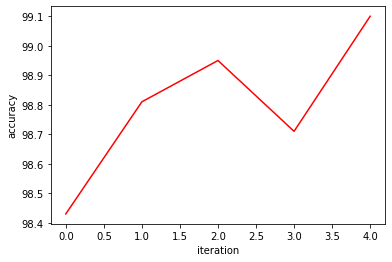

In [12]:
# Resnet18 with pretrained weights

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # Select the device

# Train : 
train_optim(pretrained_resnet18, epochs=Iteration, log_frequency=logs, device=device, learning_rate=eta)

**Question** : visualize the `requires_grad` attribute of the instanciated pretrained ResNet18 before and after applying the `freeze_model` method. Do you see the change ?  

*Answer : When you freeze a model, you set all its param.requires_gred to False. (So the system will not update the parameters)*

In [20]:
for param in pretrained_resnet18.parameters():
  param.requires_grad
  #print(param.requires_grad) # Uncomment to print the value

freeze_model(pretrained_resnet18)

for param in pretrained_resnet18.parameters():
  param.requires_grad
  #print(param.requires_grad) # Uncomment to print the value

Pay attention at the moment when you call `freeze_model` function. If you use it after you changed some layers (like you did in the previous exercice), those layers won't be updated and no training will occure to you model. To avoid this kind of problems, you can follow these steps when using a model as a feature extractor :
1. Instanciate a model with `pretrained=True`
2. Use the `freeze_model` function to freeze model parameters
3. Do the appropriate changes to adapt the model to your task.

In [22]:
# Resnet18 with pretrained weights (and FREEZE)
pretrained_freeze_resnet18 = models.resnet18(pretrained=True)
freeze_model(pretrained_freeze_resnet18)
pretrained_freeze_resnet18.conv1 = torch.nn.Conv2d(1, 64, (7,7), stride=(2,2), padding=(3,3), bias=False) # Change the first conv layer to fit with our data
pretrained_freeze_resnet18.fc = torch.nn.Linear(512, 10) # Change "output layer" to fit with our 10 classes

**Note for the next code cell :** We update the iteration number to 10 (or more) because with 5 iterations we obtain 91.82% (final accuracy).

epoch: 001, batch: 001, loss: 0.303 
epoch: 001, batch: 901, loss: 0.289 
epoch: 001, batch: 1801, loss: 0.152 
[validation] accuracy: 92.080%

epoch: 002, batch: 001, loss: 0.250 
epoch: 002, batch: 901, loss: 0.117 
epoch: 002, batch: 1801, loss: 0.253 
[validation] accuracy: 91.790%

epoch: 003, batch: 001, loss: 0.324 
epoch: 003, batch: 901, loss: 0.301 
epoch: 003, batch: 1801, loss: 0.203 
[validation] accuracy: 92.120%

epoch: 004, batch: 001, loss: 0.202 
epoch: 004, batch: 901, loss: 0.233 
epoch: 004, batch: 1801, loss: 0.290 
[validation] accuracy: 92.220%

epoch: 005, batch: 001, loss: 0.267 
epoch: 005, batch: 901, loss: 0.242 
epoch: 005, batch: 1801, loss: 0.303 
[validation] accuracy: 92.930%

epoch: 006, batch: 001, loss: 0.142 
epoch: 006, batch: 901, loss: 0.667 
epoch: 006, batch: 1801, loss: 0.220 
[validation] accuracy: 92.680%

epoch: 007, batch: 001, loss: 0.930 
epoch: 007, batch: 901, loss: 0.281 
epoch: 007, batch: 1801, loss: 0.111 
[validation] accuracy: 9

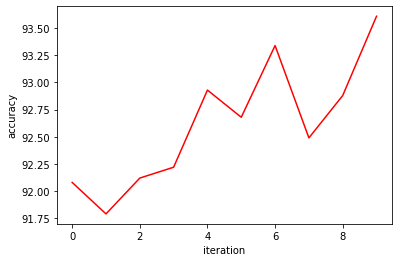

In [24]:
# Resnet18 with pretrained weights (and FREEZE)

D_out = 10 # Number of classes for this classification problem
eta = 1e-3 # Learning rate
Iteration = 10 # Epochs / Number of iteration
logs = 900 # Log Frequency

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # Select the device

# Train : 
train_optim(pretrained_freeze_resnet18, epochs=Iteration, log_frequency=logs, device=device, learning_rate=eta)

**Question** : how will you do for the previous exercise where the first and last layer must be trained ? 

*Answer : We need to set all param.requires_grad of the model to True.*

In [25]:
def unfreeze_model(model):
  for param in model.parameters():
    param.requires_grad = True

## Exercise : 
In this exercice, you will work on CIFAR10 dataset. 

You are asked to use ResNet (or any other model!) as a feature extractor. 

Add a multi-layer perceptron of your choice to solve the classification task.


In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models

Let's load the CIFAR10 dataset. This dataset contains 60000 images from 10 classes as shown in the picture below. The images are 3 channels 32x32 pixel.

![](https://pytorch.org/tutorials/_images/cifar10.png)

In [26]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') # 10 classes

print("Number of training instances: {}\nNumber of test instances : {}".format(len(trainset), len(testset)))0

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Number of training instances: 50000
Number of test instances : 10000


In [34]:
def buildMLP(D_in,D_out,H,nb_hidden_layers): # FFN: Feedforward network - MLP: Multi Layers Perceptron

  assert nb_hidden_layers >= 2, "nb_hidden_layers must be >= 2"
  
  # defining the first hidden layer
  layers = [
            torch.nn.Linear(D_in, H),
            torch.nn.ReLU()
            ]

  # adding any extra hidden layers
  for i in range(nb_hidden_layers -2):
    layers += [
              torch.nn.Linear(H, H),
              torch.nn.ReLU()
              ]

  # adding the output layer
  layers += [
            torch.nn.Linear(H, D_out)
            ]

  model = torch.nn.Sequential(*layers) # The single star * unpacks the sequence/collection into positional arguments

  return model

In [35]:
# Resnet 18
resnet18 = models.resnet18(pretrained=True)
freeze_model(resnet18)
MLPmodel = buildMLP(512,10,1024,5)
resnet18.fc = MLPmodel

print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

epoch: 001, batch: 001, loss: 2.317 
epoch: 001, batch: 901, loss: 1.912 
epoch: 001, batch: 1801, loss: 1.860 
epoch: 001, batch: 2701, loss: 1.953 
epoch: 001, batch: 3601, loss: 1.676 
epoch: 001, batch: 4501, loss: 2.283 
epoch: 001, batch: 5401, loss: 1.848 
epoch: 001, batch: 6301, loss: 1.925 
epoch: 001, batch: 7201, loss: 1.437 
epoch: 001, batch: 8101, loss: 2.151 
epoch: 001, batch: 9001, loss: 2.154 
epoch: 001, batch: 9901, loss: 2.254 
epoch: 001, batch: 10801, loss: 1.708 
epoch: 001, batch: 11701, loss: 1.895 
[validation] accuracy: 27.390%

epoch: 002, batch: 001, loss: 2.580 
epoch: 002, batch: 901, loss: 1.476 
epoch: 002, batch: 1801, loss: 1.761 
epoch: 002, batch: 2701, loss: 1.199 
epoch: 002, batch: 3601, loss: 2.043 
epoch: 002, batch: 4501, loss: 1.655 
epoch: 002, batch: 5401, loss: 2.397 
epoch: 002, batch: 6301, loss: 1.742 
epoch: 002, batch: 7201, loss: 1.889 
epoch: 002, batch: 8101, loss: 1.497 
epoch: 002, batch: 9001, loss: 1.922 
epoch: 002, batch: 9

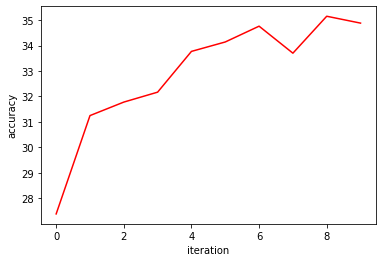

In [36]:
# Resnet18

D_out = 10 # Number of classes for this classification problem
eta = 1e-3 # Learning rate
Iteration = 10 # Epochs / Number of iteration
logs = 900 # Log Frequency

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # Select the device

# Train : 
train_optim(resnet18, epochs=Iteration, log_frequency=logs, device=device, learning_rate=eta)

In [39]:
# Resnet 50
resnet50 = models.resnet50(pretrained=True)
freeze_model(resnet50)
MLPmodel = buildMLP(2048,10,1024,5)
resnet50.fc = MLPmodel

print(resnet50)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

epoch: 001, batch: 001, loss: 2.292 
epoch: 001, batch: 5001, loss: 2.393 
epoch: 001, batch: 10001, loss: 2.162 
[validation] accuracy: 23.370%

epoch: 002, batch: 001, loss: 2.402 
epoch: 002, batch: 5001, loss: 2.291 
epoch: 002, batch: 10001, loss: 2.159 
[validation] accuracy: 23.860%

epoch: 003, batch: 001, loss: 1.747 
epoch: 003, batch: 5001, loss: 2.087 
epoch: 003, batch: 10001, loss: 1.733 
[validation] accuracy: 23.580%

epoch: 004, batch: 001, loss: 1.641 
epoch: 004, batch: 5001, loss: 2.299 
epoch: 004, batch: 10001, loss: 2.244 
[validation] accuracy: 25.590%

epoch: 005, batch: 001, loss: 2.126 
epoch: 005, batch: 5001, loss: 2.712 
epoch: 005, batch: 10001, loss: 2.170 
[validation] accuracy: 26.390%

epoch: 006, batch: 001, loss: 1.656 
epoch: 006, batch: 5001, loss: 1.740 
epoch: 006, batch: 10001, loss: 2.003 
[validation] accuracy: 27.200%

epoch: 007, batch: 001, loss: 1.520 
epoch: 007, batch: 5001, loss: 1.626 
epoch: 007, batch: 10001, loss: 1.728 
[validatio

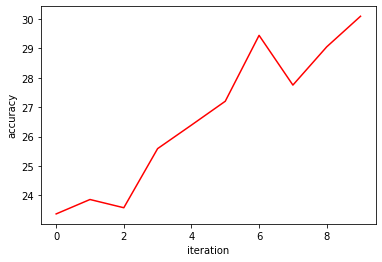

In [41]:
# Resnet50

D_out = 10 # Number of classes for this classification problem
eta = 1e-3 # Learning rate
Iteration = 10 # Epochs / Number of iteration
logs = 5000 # Log Frequency

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # Select the device

# Train : 
train_optim(resnet50, epochs=Iteration, log_frequency=logs, device=device, learning_rate=eta)

**Note for Alexnet :** It will not work here because alexnet wants 227x227 images (here it's only 32x32).

In [46]:
# Alexnet 
alexnet = models.alexnet(pretrained=True)
freeze_model(alexnet)
MLPmodel = buildMLP(1000,10,1024,5)

layers = [
  torch.nn.Linear(1000, 10)
]
alexnet.fc = torch.nn.Sequential(*layers)

print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# Alexnet

D_out = 10 # Number of classes for this classification problem
eta = 1e-3 # Learning rate
Iteration = 10 # Epochs / Number of iteration
logs = 5000 # Log Frequency

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # Select the device

# Train : 
train_optim(alexnet, epochs=Iteration, log_frequency=logs, device=device, learning_rate=eta)

Credits for the animation : 
https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html